In [ ]:
#import

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

### **Task 1: Data Loading and Exploration**

In [ ]:
## 1

# Read dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
## 2

# Train dimensions
print("Train number of rows: ", x_train.shape[0])
print("Train number of columns: ", x_train.shape[1])

# Test dimensions
print("Test number of rows: ", x_test.shape[0])
print("Test number of columns: ", x_test.shape[1])

Train number of rows:  60000
Train number of columns:  28
Test number of rows:  10000
Test number of columns:  28


Train Plots:


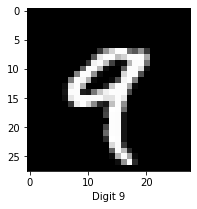

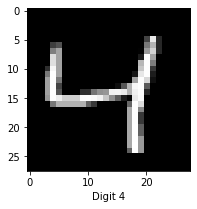

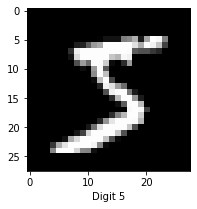

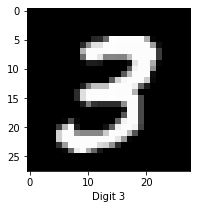

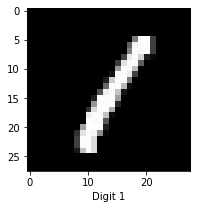

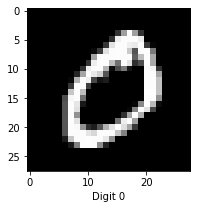

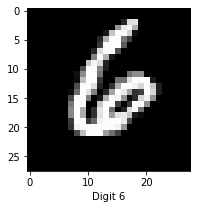

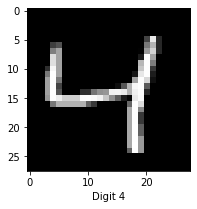

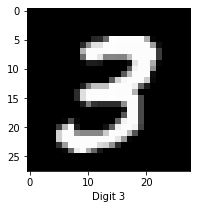

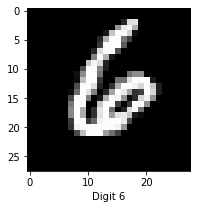


Test Plots:


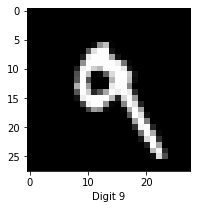

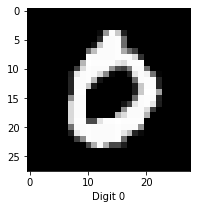

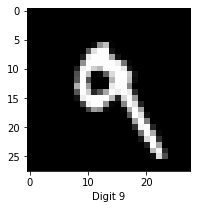

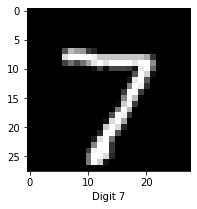

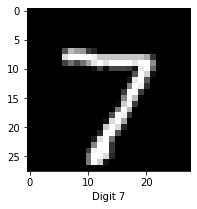

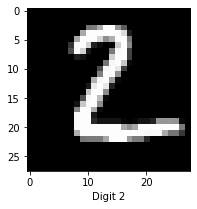

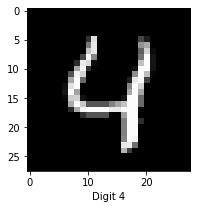

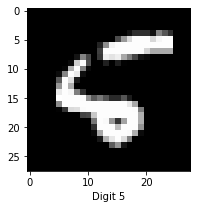

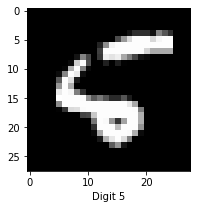

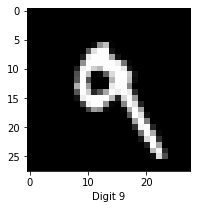

In [ ]:
## 3

# Train plots
print("Train Plots:")
for i in range(10):
 digit = random.randint(0, 9) # Chose random digits to plot
 image = x_train[np.where(y_train == digit)[0][0]]
 plt.figure(figsize=(3,3))
 plt.xlabel("{}{}".format("Digit ", digit))
 plt.imshow(image, cmap='gray')
 plt.axis()
plt.show()

# Test plots
print("\nTest Plots:")
for i in range(10):
 digit = random.randint(0, 9) # Chose random digits to plot
 image = x_test[np.where(y_test == digit)[0][0]]
 plt.figure(figsize=(3,3))
 plt.xlabel("{}{}".format("Digit ", digit))
 plt.imshow(image, cmap='gray')
 plt.axis()
plt.show()

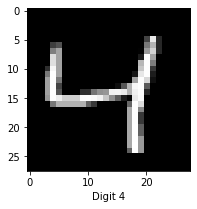

In [ ]:
## 4

# Set the digit to 4
digit = 4
image = x_train[np.where(y_train == digit)[0][0]]

# Plot digit 4
plt.figure(figsize=(3,3))
plt.xlabel("Digit 4")
plt.imshow(image, cmap='gray')
plt.axis()
plt.show()

In [ ]:
## 5

# Reshape the data from (28, 28) to (28 * 28,)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Normalize features values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

### **Task 2: Classification using SVM** 

In [ ]:
## 6

# Train & fit a linear SVM model
clf = svm.SVC(kernel='linear').fit(x_train, y_train) 

Traning: 

Accuracy:  0.97075

Confusion matrix: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


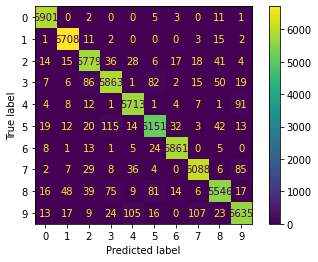


Testing: 

Accuracy:  0.9404

Confusion matrix: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


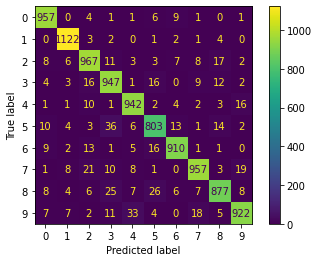

In [ ]:
## 7

print("Traning: ")

# Predict the model
y_pred = clf.predict(x_train)
# Calculate & print the accuracy
print("\nAccuracy: ", accuracy_score(y_train, y_pred)) 

# Make & plot the confusion matrix
print("\nConfusion matrix: ")
cm = confusion_matrix(y_train, y_pred)
plot_confusion_matrix(clf, x_train, y_train)
plt.show()

print("\nTesting: ")

# Predict the model
y_pred = clf.predict(x_test)
# Calculate & print the accuracy
print("\nAccuracy: ", accuracy_score(y_test, y_pred)) 

# Make and plot the confusion matrix
print("\nConfusion matrix: ")
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

In [ ]:
## 8

# Train & fit a rbf SVM model with c=1 & default value of gamma
clf = svm.SVC(kernel='rbf', C=1, gamma='scale').fit(x_train, y_train) 

Traning: 

Accuracy:  0.9899166666666667

Confusion matrix: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


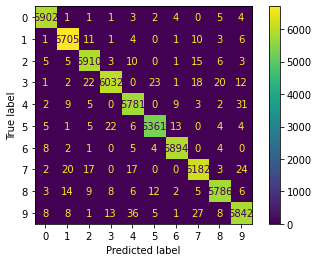


Testing: 

Accuracy:  0.9792

Confusion matrix: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


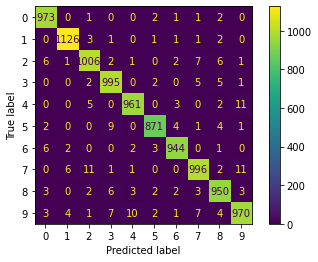

In [ ]:
## 9

print("Traning: ")

# Predict the model
y_pred = clf.predict(x_train)
# Calculate & print the accuracy
print("\nAccuracy: ", accuracy_score(y_train, y_pred)) 

# Make & plot the confusion matrix
print("\nConfusion matrix: ")
cm = confusion_matrix(y_train, y_pred)
plot_confusion_matrix(clf, x_train, y_train)
plt.show()

print("\nTesting: ")

# Predict the model
y_pred = clf.predict(x_test)
# Calculate & print the accuracy
print("\nAccuracy: ", accuracy_score(y_test, y_pred)) 

# Make & plot the confusion matrix
print("\nConfusion matrix: ")
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

In [ ]:
## 10

# Specify the set values of C and gamma
param_grid = {'C': [5, 10], 'gamma': [0.01, 0.001]}

# Find the best parameters using GridSearchCV object
grid = GridSearchCV(clf, param_grid, cv=2).fit(x_train, y_train)

# Print the best parameters
print("Best parameters: ", grid.best_params_)

Best parameters:  {'C': 10, 'gamma': 0.01}


Traning: 

Accuracy:  0.9995666666666667

Confusion matrix: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


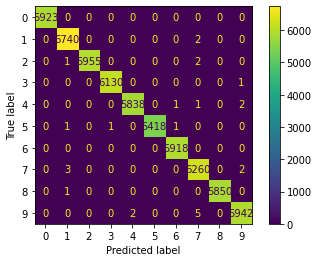


Testing: 

Accuracy:  0.9833

Confusion matrix: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


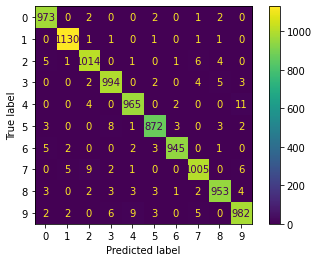

In [ ]:
## 11

# Train & fit a rbf SVM model with the best parameters
clf = svm.SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma']).fit(x_train, y_train) 

print("Traning: ")

# Predict the model
y_pred = clf.predict(x_train)
# Calculate & print the accuracy
print("\nAccuracy: ", accuracy_score(y_train, y_pred))

# Make & plot the confusion matrix
print("\nConfusion matrix: ")
cm = confusion_matrix(y_train, y_pred)
plot_confusion_matrix(clf, x_train, y_train)
plt.show()

print("\nTesting: ")

# Predict the model
y_pred = clf.predict(x_test)
# Calculate & print the accuracy
print("\nAccuracy: ", accuracy_score(y_test, y_pred)) 

# Make & plot the confusion matrix
print("\nConfusion matrix: ")
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

12 **Discussion:**

SVM model using Linear kernel:

- The accuracy of the model is 0.97, which means that the model was able to correctly predict the class for 97% of the traning data.
- The accuracy of the model is 0.94, which means that the model was able to correctly predict the class for 94% of the testing data.
- Overall, the performance is very good.

SVM model using RBF Kernel:

- The accuracy of the model is 0.98, which means that the model was able to correctly predict the class for 98% of the traning data.
- The accuracy of the model is 0.97, which means that the model was able to correctly predict the class for 97% of the testing data.
- Overall, the performance is very good and a little bit better than the SVM model using Linear kernel.

SVM model with the best parameters:

- The accuracy of the model is 0.99, which means that the model was able to correctly predict the class for 99% of the traning data.
- The accuracy of the model is 0.98, which means that the model was able to correctly predict the class for 98% of the testing data.
- Overall, the performance is very good and a little bit better than SVM model using RBF Kernel. Besides, we can see that after adjusting the parameters to the best parameters the accuracy has increased.

All the models are good in term of performance but, SVM model using the best parameters is the best among them since it has the highest accuracy value. 


### **Task 2: Classification using Neural Network** 

In [ ]:
## 13

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3724 - accuracy: 0.8918 - val_loss: 0.1669 - val_accuracy: 0.9515
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1793 - accuracy: 0.9483 - val_loss: 0.1176 - val_accuracy: 0.9653
Epoch 3/20
469/469 [==========

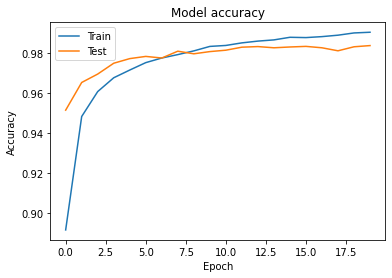

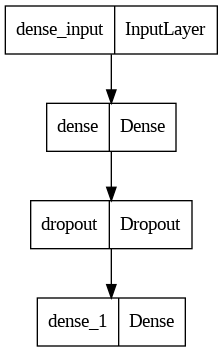

In [ ]:
## 14

# Define the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

# Evaluate the model on the train data
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
# Print the accuracy score
print('Train accuracy:', train_acc)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
# Print the accuracy score
print('\nTest accuracy:', test_acc)

# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the model
plot_model(model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [============================

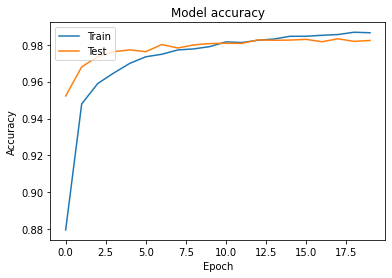

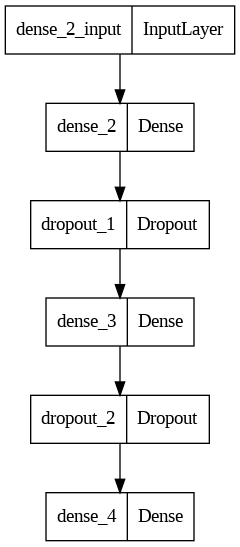

In [ ]:
## 15

# Build the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

# Evaluate the model on the train data
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
# Print the accuracy score
print('Train accuracy:', train_acc)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
# Print the accuracy score
print('\nTest accuracy:', test_acc)

# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the model
plot_model(model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

16 **Comparison:**

Moedel with the first configuration:
- The accuracy of the model is 0.9978, which means that the model was able to correctly predict the class for 99.78% of the traning data.
- The accuracy of the model is 0.983, which means that the model was able to correctly predict the class for 98.3% of the testing data.
- Overall, the performance is very good.

Moedel with the second configuration:
- The accuracy of the model is 0.9972, which means that the model was able to correctly predict the class for 99.72% of the traning data.
- The accuracy of the model is 0.982, which means that the model was able to correctly predict the class for 98.2% of the testing data.
- Overall, the performance is very good. But, the model with the first configuration is slightly better since it has a higher accuracy.


17 **Best Model:**

The best two models are:

SVM model with the best parameters:
- Train accuracy equal to 0.9995666666666667.
- Test accuracy equal to 0.9833.

First configuration neural network:
- Train accuracy equal to 0.9978166818618774.
- Test accuracy equal to 0.9836999773979187.

The svm model has higher training accuracy, but the neural network has a slightly higher testing accuracy. This suggests that the neural network is more likely to generalize well to new, unseen data, and is therefore likely a better model.

So, **First configuration neural network** is the best model.

